<a href="https://colab.research.google.com/github/robertdc2/IS-160-AI-In-Business/blob/Lab-4-DL-Exploration/IS160_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Robert Sanchez
Joseph Delgadillo
Jugraj Dulay

IMDB dataset Example

3.1 Loading the IMDB dataset

In [ ]:
from keras.datasets import imdb  #import IMDB dataset from Keras
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #will only load the top 10,000 most frequently occuring words in the trainign data

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
train_data[0]
[1, 14, 22, 16, ..., 178, 32]
train_labels[0]          #train_labels and test_labels are lists of 0s and 1s, 0 stands for negative and 1 stands for positive
1
max([max(sequence)for sequence in train_data]) #restricting ourselves to the top 10,000 most frequent words, no word index will exceed 10,000
9999

9999

In [ ]:
word_index = imdb.get_word_index() #word_index is a dictionary mapping words to an integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]) #reverses it, mapping integrer indices to words
decoded_review = ' '.join (
    [reverse_word_index.get(i - 3, '?') for i in train_data [0]]) #decodes the review


1641221/1641221 [==============================] - 0s 0us/step


3.2 Encoding the integer sequences into a binary matrix

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000) :
    results = np.zeros ((len(sequences), dimension)) #Creates an all-zero matrix of shape (len(sequences),dimension)
    for i, sequence in enumerate (sequences) :
        results[i, sequence] = 1. #Sets specific indices of results [i] to 1s
    return results
x_train = vectorize_sequences(train_data) #vectorized training data
x_test = vectorize_sequences(test_data) #Vectorized test data


In [ ]:
x_train[0]
([ 0., 1., 1., ..., 0., 0., 0.])

y_train = np.asarray(train_labels) .astype('float32') #labels vectorized
y_test = np.asarray(test_labels) .astype('float32') #data is ready to be fed into a neural network

3.3 The model definition

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) #implement the relu activation function
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate (x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4786 - accuracy: 0.8065
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2780 - accuracy: 0.9036
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2186 - accuracy: 0.9212
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2990 - accuracy: 0.8806


3.4 Compiling the model

In [ ]:
model.compile(optimizer='rmsprop',  # choose a loss function and optimizer
              loss='binary_crossentropy' , #use crossentropy function when dealing with models that output probabilities
              metrics=['accuracy'])

3.5 Configuring the optimizer

In [ ]:
from keras import optimizers          #configure the model with the rmsprop optimizer and the binary_crossentropy loss function

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

3.6 Using custom losses and metrics

In [ ]:
from keras import losses   #passing the optimizer class instance as the optimizer argument
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

3.7 Setting aside a validation set

In [ ]:
x_val = x_train[:10000]    #create a validation set by setting apart 10,000 samples from the original data
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

3.8 Training your model

In [ ]:
model.compile(optimizer='rmsprop', #train the model for 20 epochs in mini batches of 512 samples
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train, #20 iterations over all samples in the x_train and y_train tensors
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) #passing the validation data as the validation_data argument

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1654 - acc: 0.9408 - val_loss: 0.1611 - val_acc: 0.9437
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1380 - acc: 0.9529 - val_loss: 0.1787 - val_acc: 0.9324
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1194 - acc: 0.9622 - val_loss: 0.1946 - val_acc: 0.9241
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1005 - acc: 0.9702 - val_loss: 0.1950 - val_acc: 0.9269
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0930 - acc: 0.9721 - val_loss: 0.2101 - val_acc: 0.9207
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0784 - acc: 0.9783 - val_loss: 0.2375 - val_acc: 0.9127
Epoch 7/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0686 - acc: 0.9820 - val_loss: 0.2394 - val_acc: 0.9143
Epoch 8/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0587 - a

3.9 plotting the training and validation loss

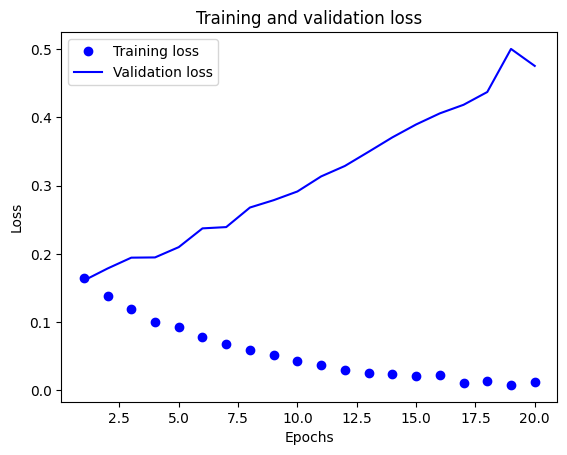

In [ ]:
import matplotlib.pyplot as plt #use Matplotlib to plot the training and validation loss side by side

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #"bo" is for "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # "b" is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

3.10 Plotting the training and validation accuracy

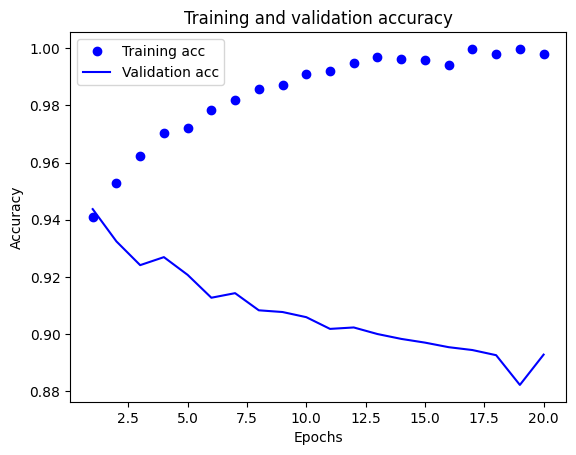

In [ ]:
plt.clf()    #clears the figure
acc= history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')   #training and validation accuracy gets plotted
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

3.11 Retraining a model from scratch

In [ ]:
model = models.Sequential()       #a new network is now trained from scratch fo four epochs and then evaluate it on the test data
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)       #the model receives an accuracy of 93%

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.4778 - accuracy: 0.8071
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2799 - accuracy: 0.9035
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2193 - accuracy: 0.9209
Epoch 4/4
49/49 [==============================] - 1s 12ms/step - loss: 0.1864 - accuracy: 0.9340


First Kaggle Dataset
`

In [ ]:
!pip install tensorflow

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#Import libraries and install tensorflow

In [ ]:
#load CSV data
df = pd.read_csv('Reviews2.csv')

#Extract feathures and target labels
target_column = 'buy'
x = df.drop('buy', axis=1)
y = df['buy']

#Split data for training and testing

X_train, X_test, _train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Assuming "buy" is your target variable
df['buy'] = df['buy'].map({'Yes': 1, 'No': 0})  # Map non-numeric values to 0 and 1


In this dataset, we chose the data product reviews. Since it was long data, we did decrease its size and made it so that it can be used with deep learning. In order to make it even better, we added, the column buy, so that whenever the product score was 4 or 5,  it say yes buy again

In [ ]:
#Add layers and use Sequential

model = keras.Sequential()

# Add an input layer (assuming your input features have 4 dimensions)
model.add(keras.layers.Input(shape=(4,)))

# Add one or more hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Add an output layer (assuming you have a binary classification task)
model.add(keras.layers.Dense(1, activation='sigmoid'))




In [ ]:
# loss function and optimizer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#train model

# Specify the number of training epochs and batch size
epochs = 10
batch_size = 32

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/10
3/3 [==============================] - 1s 67ms/step - loss: 1.3190 - accuracy: 0.0127 - val_loss: 0.8812 - val_accuracy: 0.7000
Epoch 2/10
3/3 [==============================] - 0s 13ms/step - loss: -10.8018 - accuracy: 0.0380 - val_loss: 1.7589 - val_accuracy: 0.7000
Epoch 3/10
3/3 [==============================] - 0s 12ms/step - loss: -22.3666 - accuracy: 0.0380 - val_loss: 2.7468 - val_accuracy: 0.7000
Epoch 4/10
3/3 [==============================] - 0s 13ms/step - loss: -33.5712 - accuracy: 0.0380 - val_loss: 3.7601 - val_accuracy: 0.7000
Epoch 5/10
3/3 [==============================] - 0s 14ms/step - loss: -45.2048 - accuracy: 0.0380 - val_loss: 4.7213 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: -57.0097 - accuracy: 0.0380 - val_loss: 5.7048 - val_accuracy: 0.7000
Epoch 7/10
3/3 [==============================] - 0s 15ms/step - loss: -68.6919 - accuracy: 0.0380 - val_loss: 6.7540 - val_accuracy: 0.7000
Epoch 8/10
3/3 

In [ ]:
#evaluate model

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


1/1 [==============================] - 0s 19ms/step - loss: 12.8615 - accuracy: 0.7000
Test Loss: 12.8614501953125
Test Accuracy: 0.699999988079071


In [ ]:
#Import model form keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(4,))) #implement the relu activation function
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)

results = model.evaluate (X_test, y_test)

Epoch 1/4
1/1 [==============================] - 0s 403ms/step - loss: 25.4429 - accuracy: 0.0127
Epoch 2/4
1/1 [==============================] - 0s 7ms/step - loss: 18.0709 - accuracy: 0.0127
Epoch 3/4
1/1 [==============================] - 0s 7ms/step - loss: 12.7903 - accuracy: 0.0127
Epoch 4/4
1/1 [==============================] - 0s 100ms/step - loss: 1.1284 - accuracy: 0.6000


In [ ]:
model.compile(optimizer='rmsprop',  # choose a loss function and optimizer
              loss='binary_crossentropy' , #use crossentropy function when dealing with models that output probabilities
              metrics=['accuracy'])

In [ ]:
from keras import optimizers          #configure the model with the rmsprop optimizer and the binary_crossentropy loss function

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = X_train[:4]    #create a validation set by setting apart 4 samples from the original data
partial_X_train = X_train[4:]
y_val = y_train[:4]
partial_y_train = y_train[4:]

In [ ]:
model.compile(optimizer='rmsprop', #train the model for 20 epochs in mini batches of 512 samples
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_X_train, #20 iterations over all samples in the x_train and y_train tensors
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) #passing the validation data as the validation_data argument

Epoch 1/20
1/1 [==============================] - 1s 569ms/step - loss: 4.6987 - acc: 0.0133 - val_loss: -2.0455 - val_acc: 0.0000e+00
Epoch 2/20
1/1 [==============================] - 0s 37ms/step - loss: -2.1008 - acc: 0.0267 - val_loss: -5.7303 - val_acc: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 0s 34ms/step - loss: -6.3307 - acc: 0.0400 - val_loss: -8.2566 - val_acc: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 0s 31ms/step - loss: -9.4135 - acc: 0.0400 - val_loss: -10.2923 - val_acc: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 0s 52ms/step - loss: -11.8116 - acc: 0.0400 - val_loss: -12.1156 - val_acc: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 50ms/step - loss: -13.9701 - acc: 0.0400 - val_loss: -13.8321 - val_acc: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 30ms/step - loss: -16.0085 - acc: 0.0400 - val_loss: -15.4782 - val_acc: 0.0000e+00
Epoch 8/20
1/1 [==============================] 

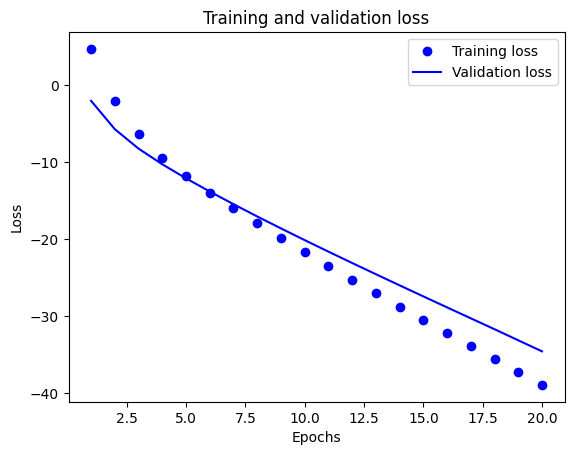

In [ ]:
import matplotlib.pyplot as plt #use Matplotlib to plot the training and validation loss side by side

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #"bo" is for "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # "b" is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

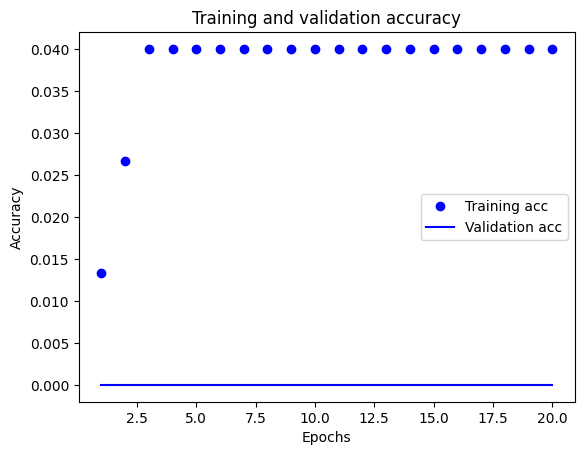

In [ ]:
plt.clf()    #clears the figure
acc= history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')   #training and validation accuracy gets plotted
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()       #a new network is now trained from scratch fo four epochs and then evaluate it on the test data
model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(X_test, y_test)       #the model receives an accuracy of 93%

Epoch 1/4
1/1 [==============================] - 0s 400ms/step - loss: 10.9564 - accuracy: 0.0000e+00
Epoch 2/4
1/1 [==============================] - 0s 7ms/step - loss: 7.0416 - accuracy: 0.0000e+00
Epoch 3/4
1/1 [==============================] - 0s 8ms/step - loss: 4.2867 - accuracy: 0.0127
Epoch 4/4
1/1 [==============================] - 0s 94ms/step - loss: 0.6675 - accuracy: 0.5500


Kaggle DataSet #2


This data contains information for patients and if they have heart disease or not

In [ ]:
!pip install tensorflow

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#Import libraries and install tensorflow

In [ ]:
#load CSV data
df = pd.read_csv('/content/heart.csv')
# change column to binary
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 1, 'Y': 0})  # Map non-numeric values to 0 and 1

#change ST slope Column to binary
df['ST_Slope'] = df['ST_Slope'].map({'Up': 1, 'Flat': 0})  # Map non-numeric values to 0 and 1

#change sex column to binary
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})  # Map non-numeric values to 0 and 1

In [ ]:
# Convert a specific column (e.g., 'float_column') to integers
df['Oldpeak'] = df['Oldpeak'].astype(int)

#st slope column
df['ST_Slope'] = df['ST_Slope'].fillna(0).astype(int)

df['ST_Slope'] = df['ST_Slope'].astype(int)


In [ ]:
columns_to_drop = ['RestingECG', 'ChestPainType']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

# Save the modified DataFrame to a new CSV file

output_csv = 'output_dataset.csv'
df.to_csv(output_csv, index=False)

print(df)

In [ ]:


#Extract feathures and target labels
target_column = 'HeartDisease'
X = df.drop ('HeartDisease', axis=1)
y = df ['HeartDisease']


#Split data for training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
df.columns
print(df.head(5))

   Age  Sex  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  \
0   40    1        140          289          0    172               1   
1   49    0        160          180          0    156               1   
2   37    1        130          283          0     98               1   
3   48    0        138          214          0    108               0   
4   54    1        150          195          0    122               1   

   Oldpeak  ST_Slope  HeartDisease  
0        0         1             0  
1        1         0             1  
2        0         1             0  
3        1         0             1  
4        0         1             0  


In [ ]:
#verify column data types
df.dtypes

Age               int64
Sex               int64
RestingBP         int64
Cholesterol       int64
FastingBS         int64
MaxHR             int64
ExerciseAngina    int64
Oldpeak           int64
ST_Slope          int64
HeartDisease      int64
dtype: object

In [ ]:
#Add layers and use Sequential

model = keras.Sequential()

# Add an input layer (assuming your input features have 10 dimensions)
model.add(keras.layers.Input(shape=(9,)))

# Add one or more hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Add an output layer (assuming you have a binary classification task)
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
# loss function and optimizer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#train model

# Specify the number of training epochs and batch size
epochs = 10
batch_size = 16

# Train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

#Converted all o the columns to ints but we were stll runing into this error here in this code. Unsure because the columns are not floats.

Epoch 1/10
46/46 [==============================] - 1s 6ms/step - loss: 1.2224 - accuracy: 0.6117 - val_loss: 0.5962 - val_accuracy: 0.7120
Epoch 2/10
46/46 [==============================] - 0s 3ms/step - loss: 0.6553 - accuracy: 0.6757 - val_loss: 1.0555 - val_accuracy: 0.5707
Epoch 3/10
46/46 [==============================] - 0s 3ms/step - loss: 0.6604 - accuracy: 0.6948 - val_loss: 0.8231 - val_accuracy: 0.5054
Epoch 4/10
46/46 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.7480 - val_loss: 0.6864 - val_accuracy: 0.6196
Epoch 5/10
46/46 [==============================] - 0s 3ms/step - loss: 0.5297 - accuracy: 0.7561 - val_loss: 0.6680 - val_accuracy: 0.5707
Epoch 6/10
46/46 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7452 - val_loss: 0.5626 - val_accuracy: 0.7228
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 0.6443 - accuracy: 0.6989 - val_loss: 0.6559 - val_accuracy: 0.6957
Epoch 8/10
46/46 [==

In [ ]:
#evaluate model

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

6/6 [==============================] - 0s 2ms/step - loss: 0.6104 - accuracy: 0.7011
Test Loss: 0.6104425191879272
Test Accuracy: 0.7010869383811951


In [ ]:
x_val = X_train[:4]    #create a validation set by setting apart 4 samples from the original data
partial_X_train = X_train[4:]
y_val = y_train[:4]
partial_y_train = y_train[4:]

In [ ]:
model.compile(optimizer='rmsprop', #train the model for 20 epochs in mini batches of 512 samples
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_X_train, #20 iterations over all samples in the x_train and y_train tensors
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val)) #passing the validation data as the validation_data argument

Epoch 1/20
2/2 [==============================] - 1s 288ms/step - loss: 1.6426 - acc: 0.7096 - val_loss: 0.1635 - val_acc: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 101ms/step - loss: 0.8673 - acc: 0.6534 - val_loss: 0.7257 - val_acc: 0.7500
Epoch 3/20
2/2 [==============================] - 0s 61ms/step - loss: 1.2667 - acc: 0.5808 - val_loss: 0.4066 - val_acc: 0.7500
Epoch 4/20
2/2 [==============================] - 0s 73ms/step - loss: 0.8371 - acc: 0.6219 - val_loss: 0.3158 - val_acc: 0.7500
Epoch 5/20
2/2 [==============================] - 0s 69ms/step - loss: 0.6849 - acc: 0.6644 - val_loss: 0.2735 - val_acc: 0.7500
Epoch 6/20
2/2 [==============================] - 0s 93ms/step - loss: 0.6637 - acc: 0.6849 - val_loss: 0.2842 - val_acc: 0.7500
Epoch 7/20
2/2 [==============================] - 0s 91ms/step - loss: 0.6684 - acc: 0.6726 - val_loss: 0.2885 - val_acc: 0.7500
Epoch 8/20
2/2 [==============================] - 0s 100ms/step - loss: 0.6933 - acc: 0.6521 - 

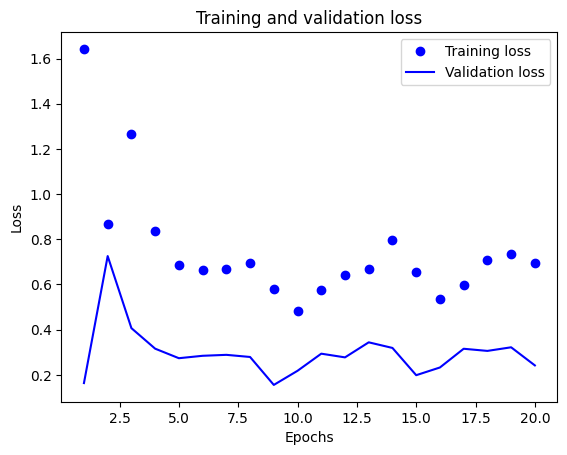

In [ ]:
import matplotlib.pyplot as plt #use Matplotlib to plot the training and validation loss side by side

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')  #"bo" is for "blue dot"
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # "b" is for solid blue line
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

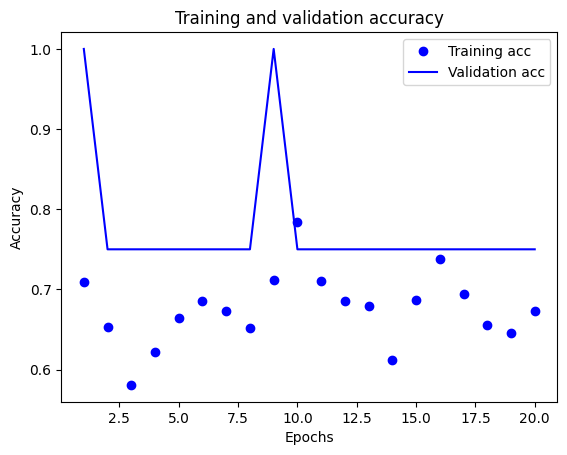

In [ ]:
plt.clf()    #clears the figure
acc= history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')   #training and validation accuracy gets plotted
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()




Dataset #3



This fashion dataset consists of 60,000 training images and 10,000 testing images, each of size 28x28 pixels. These images represent various clothing items and accessories.

In [ ]:
import numpy as np    # Import necessary libraries and modules for building a neural network on the Fashion MNIST dataset
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.optimizers import SGD, Adam
from keras.losses import CategoricalCrossentropy
from keras.utils import to_categorical

In [ ]:
# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [ ]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)  # 10 classes in Fashion MNIST
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Build a simple neural network model
model_sgd = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_adam = Sequential([  # Define a neural network model using Keras Sequential API
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the models with categorical cross-entropy loss and optimizers
model_sgd.compile(optimizer=SGD(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model_adam.compile(optimizer=Adam(learning_rate=0.001),
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [ ]:
# Train the models
history_sgd = model_sgd.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.8054 - accuracy: 0.7409 - val_loss: 0.5925 - val_accuracy: 0.7993
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5387 - accuracy: 0.8182 - val_loss: 0.5105 - val_accuracy: 0.8214
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4863 - accuracy: 0.8335 - val_loss: 0.4786 - val_accuracy: 0.8317
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4593 - accuracy: 0.8417 - val_loss: 0.4567 - val_accuracy: 0.8397
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4404 - accuracy: 0.8473 - val_loss: 0.4434 - val_accuracy: 0.8439
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4252 - accuracy: 0.8530 - val_loss: 0.4312 - val_accuracy: 0.8492
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4130 - accuracy: 0.8569 - val_loss: 0.4156 - val_accuracy

In [ ]:
# Evaluate the models on the test set
loss_sgd, accuracy_sgd = model_sgd.evaluate(X_test, y_test)
loss_adam, accuracy_adam = model_adam.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3485 - accuracy: 0.8780


In [ ]:
print('SGD Model - Test accuracy:', accuracy_sgd)  # Print the test accuracy for the model trained with SGD optimizer
print('Adam Model - Test accuracy:', accuracy_adam)  # Print the test accuracy for the model trained with Adam optimizer

SGD Model - Test accuracy: 0.8499000072479248
Adam Model - Test accuracy: 0.878000020980835


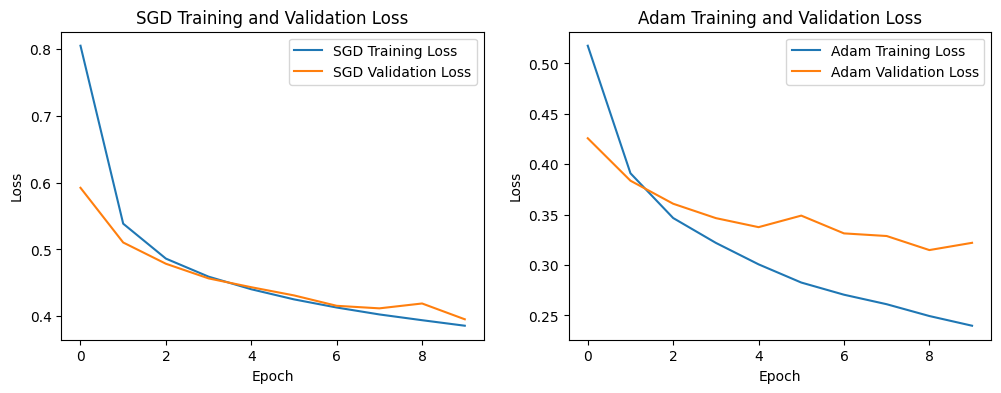

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_sgd.history['loss'], label='SGD Training Loss')      # Subplot 1: SGD Training and Validation Loss
plt.plot(history_sgd.history['val_loss'], label='SGD Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('SGD Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam Training Loss')    # Subplot 2: Adam Training and Validation Loss
plt.plot(history_adam.history['val_loss'], label='Adam Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Adam Training and Validation Loss')

plt.show()  # Display the entire plot with both subplots